# Trapezoidal rule

When only two measurements of the system are accessible, the trapezoid rule is the easiest way to estimate an integral. It then approximates the area of the resulting trapezoid shape by interpolating a polynomial between the two points (i.e., a single straight diagonal line).

`````{admonition} Area of Trapezoid
:class: important

\begin{align}
\text{Area of a trapezoid} & = \frac{1}{2} \, \text{(sum of parallel sides)}~\text{(distance between them)}
\notag 
\\ & = \frac{1}{2}\,(a + b)\, \times\, h.
\end{align}

`````

```{figure} ../Figs/fig5_00.png
---
height: 200px
name: directive-fig
---
A Trapezoid.
```

Assume $\{x_{0},~x_{1}\} \in [a,b]$, for some values of $a$ and $b$, are known and we are interested in calculating the area under the curve for a function of $f(x)$ which is unknown, but we have access to the value of $f(x_{0})$ and $f(x_{1})$. Then,
\begin{equation*}
\int_{a}^{b}f(x)\,dx\approx \frac {\left(x_{1} - x_{0}\right)}{2} \left(f(x_{0})+f(x_{1})\right).
\end{equation*}

<center>
<iframe src="https://www.geogebra.org/classic/bjrdnu5q?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>
</center>

Moreover, in case, we use $\{x_{0},~x_{1},~x_{2}\}$ and $\{f(x_{0}),f(x_{1}), f(x_{2})\}$,
\begin{equation*}
\int_{a}^{b}f(x)\,dx\approx
{\frac {\left(x_{1} - x_{0}\right)}{2} \left(f(x_{0})+f(x_{1})\right)}+
{\frac {\left(x_{2} - x_{1}\right)}{2} \left(f(x_{1})+f(x_{2})\right)}
.
\end{equation*}


<iframe src="https://www.geogebra.org/classic/dcszuqsv?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Assume that $\{x_{0},~x_{1},\ldots,~x_{n}\}$ are $n+1$ in $[a,b]$ such that
\begin{equation*}
a=x_{0}<x_{1}<\cdots <x_{n-1}<x_{n}=b,
\end{equation*}
and $\Delta x_{j}$ is defined as $\Delta x_{j}=x_{j+1}-x_{j}$ with $0 \leq j \leq n-1$. Then,

\begin{align}\label{trap.non-equal.eq01}
\int _{a}^{b}f(x)\,dx & \approx
\frac {\Delta x_{0}}{2}\left(f(x_{0})+f(x_{1})\right) +
\frac {\Delta x_{1}}{2}\left(f(x_{1})+f(x_{2})\right) + \ldots +
\frac {\Delta x_{n-1}}{2}\left(f(x_{n-1})+f(x_{n})\right)
\notag \\ &
= \frac {1}{2}\sum _{j=0}^{n-1}\,\left(f(x_{j})+f(x_{j+1})\right)\Delta x_{j}.
\end{align}
Now if  $\{x_{0},x_{1},\ldots, x_{n}\}$ are equally distanced. i.e. $\Delta x_{j}= h = \dfrac{b-a}{n}>0$ for $j\in \{0,1,\ldots,n-1\}$,
\begin{equation}\label{trap.equal.eq01}
\int _{a}^{b}f(x)\,dx\approx \frac {h}{2}\sum _{n= 0}^{n-1} \left(f(x_{j})+f(x_{j+1})\right).
\end{equation}
Observe that,
\begin{align}\label{trap.equal.eq02}
\int _{a}^{b}f(x)\,dx & \approx
\frac {h}{2}\sum _{j=0}^{n-1} \left(f(x_{j})+f(x_{j+1})\right)
\notag \\ & =
\frac {h}{2}\left(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+2f(x_{4})+\cdots +2f(x_{n-1})+f(x_{n})\right)
\notag \\ & =
\frac {h}{2}\left(f(x_{0}) + 2\,\sum _{j=1}^{n-1}f(x_{j}) + f(x_{n})\right)
= h\left(\frac {1}{2}f(x_{0}) + \sum _{j=1}^{n-1}f(x_{j}) + \frac {1}{2}f(x_{n})\right)
\notag \\ & =
h\left(\sum _{j=1}^{n-1}f(x_{n})+{\frac {f(x_{0}) + f(x_{n})}{2}}\right)
\end{align}

`````{admonition} Remark
:class: tip

The above numerical quadrature \eqref{trap.equal.eq02} can be written as follows as well (why!?):
\begin{equation}\label{trap.equal.eq03}
\int _{a}^{b}f(x)\,dx  \approx \frac {h}{2}\sum _{j=1}^{n}\left(f(x_{j-1})+f(x_{j})\right).
\end{equation}
`````

<font color='Blue'><b>Example</b></font>:
Use the Trapezoid rule and compute ${\displaystyle\int_{0}^{1} x^2\, dx}$ when

* a. $n = 5$.
* b. $n = 10$.

<font color='Green'><b>Solution</b></font>:

a.
discretizing  $[0,~1]$ using
\begin{equation*}
h = \frac{b - a}{n} = \frac{1 - 0}{5} = 0.2
\end{equation*}
we get the following set of points,
\begin{equation*}
\left\{
0,~0.2,~0.4,~0.6,~0.8,~1.0
\right\},
\end{equation*}
\noindent
We have,
\begin{align*}
\int_{0}^{1} x^2\, dx & \approx
\frac {h}{2}\left(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+2f(x_{4})+f(x_{5})\right)
\notag \\ & =
\frac {0.2}{2}\left(f(0)+ 2f(0.2)+2f(0.4) +2f(0.6)+2f(0.8)+f(1) \right)
\notag \\ & = 0.1(0 +  2(0.04) + 2(0.16) + 2(0.36) + 2(0.64) + 1.0)
%\notag \\ &
=
 0.34
\end{align*}

b. $[0,~1]$ can be discretized using
\begin{equation*}
h = \frac{b - a}{n} = \frac{1 - 0}{10} = 0.1
\end{equation*}
as follows,
\begin{equation*}
\left\{
0,~0.1,~0.2,~0.3,~0.4,~0.5,~0.6,~0.7,~0.8,~0.9,~1.0
\right\}
\end{equation*}
We have,
\begin{align*}
\int_{0}^{1} x^2\, dx & \approx \frac {h}{2}\sum _{j=0}^{9} \left(f(x_{j})+f(x_{j+1})\right)
\notag \\ & =
\frac {0.1}{2}\left(f(0)+ 2f(0.1)+2f(0.2) + \cdots + 2f(0.8)+2f(0.9)+f(1) \right)
%\notag \\ &
 =
 0.335
\end{align*}

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def Trapz(f, a, b, N):
    '''
    Parameters
    ----------
    f : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    N : int
        DESCRIPTION. Number of xn points

    Returns
    -------
    T : float
        DESCRIPTION. Numerical Integration of f(x) on [a,b]
        through Trapezoidal rule

    '''
    
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    # discretizing function f on [a,b]
    fn = f(x)
    # the increment \delta x
    h = (b - a) / N
    # Trapezoidal rule
    T = (h/2) * np.sum(fn[1:] + fn[:-1])
    return T
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [T] = Trapz(f, a, b, N)
%{
Parameters
----------
f : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval [a, b]
b : float
    DESCRIPTION. b is the right side of interval [a, b]
N : int
    DESCRIPTION. Number of xn points

Returns
-------
T : float
    DESCRIPTION. Numerical Integration of f(x) on [a,b]
    through Trapezoidal rule

%}
% discretizing [a,b] into N subintervals
x = linspace(a, b, N+1);
% discretizing function f on [a,b]
fn = f(x);
% the increment \delta x
h = (b - a) / N;
% Trapezoidal rule
T = (h/2) * np.sum(fn(1:N) + fn(1:N-1));
```
:::

::::

<font color='Blue'><b>Example</b></font>: Use the Trapezoid rule and compute

* **a.** ${\displaystyle\int_{0}^{2} \cosh(x)\, dx}$ with $n = 10$.
* **b.** ${\displaystyle\int_{0}^{2} (1 + \tanh^2(x))\, dx}$ with $n = 20$.

For each part, calculate the absolute error.

<font color='Green'><b>Solution</b></font>: We have,

a.
Here $n = 10$ and it follows from discretizing  $[0,~2]$ using $h = \dfrac{2}{10} = 0.2$ that
\begin{equation*}
\left\{
0,~0.2,~0.4,~0.6,~0.8,~1.0,~1.2,~1.4,~1.6,~1.8,~2.0
\right\},
\end{equation*}
\noindent
Now we have,
\begin{align*}
\int_{0}^{2} \cosh(x)\, dx & \approx \frac {h}{2}\sum _{j=0}^{9} \left(f(x_{j})+f(x_{j+1})\right)
\notag \\ & =
\frac {0.2}{2}\left(f(0)+ 2f(0.2)+2f(0.4) +2f(0.6)+\cdots + 2f(1.8)+f(2.0) \right)
\notag \\ & =
3.6389418905.
\end{align*}
On the other hand, analytically, this can be calculated easily:
\begin{equation*}
\int_{0}^{2} \cosh(x)\, dx  = ( \sinh(x) {\Big|}_{0}^{2} = \sinh(2) - \sinh(0) = 3.6268604078.
\end{equation*}
Therefore, the absolute error:
\begin{equation*}
E_{h} = |3.6389418905 - 3.6268604078| = 0.0120814827.
\end{equation*}

b. Here $h = \dfrac{2 - 0}{20} = 0.1$ and
\begin{equation*}
\left\{
0,~0.1,~0.2,~0.3,~0.4,~0.5,\cdots,~1.5,~1.6,~1.7,~1.8,~1.9,~2.0
\right\},
\end{equation*}
and we get,
\begin{align*}
\int_{0}^{2} (1 + \tanh^2(x))\, dx & \approx \frac {h}{2}\sum _{j=0}^{19} \left(f(x_{j})+f(x_{j+1})\right)
\notag \\ & =
\frac {0.1}{2}\left(f(0)+ 2f(0.1)+2f(0.2)+\cdots + 2f(1.8) + 2f(1.9)+f(2.0) \right)
\notag \\ & =
3.0360858759.
\end{align*}
The exact value here is:
\begin{equation*}
\int_{0}^{2} (1 + \tanh^2(x))\, dx = ( 2\,x-\tanh\left(x\right) {\Big|}_{0}^{2} = 3.0359724199.
\end{equation*}
Thus,
\begin{equation*}
E_h = |3.0360858759 - 3.0359724199| = 0.0001134559.
\end{equation*}
\end{enumerate}

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [2]:
# This function would be useful for demonstrating Trapz method
def TrapzPlots(f, a, b, N, ax = False, CL = 'Tomato', EC = 'Blue', Font = False):
    fontsize = 14
    Fig_Params = ['legend.fontsize','axes.labelsize','axes.titlesize','xtick.labelsize','ytick.labelsize']
    Fig_Params = dict(zip(Fig_Params, len(Fig_Params)*[fontsize]))
    plt.rcParams.update(Fig_Params)

    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    x = np.linspace(a, b, N+1)
    y = f(x)

    X = np.linspace(a, b, (N**2)+1)
    Y = f(X)
    _ = ax.plot(X,Y)
    for i in range(N):
        ax.fill([x[i], x[i], x[i+1], x[i+1]], [0, f(x[i]), f(x[i+1]), 0], facecolor = CL,
                edgecolor= EC,alpha=0.3, hatch='', linewidth=1.5)
    if Font:
        _ = ax.set_title('Trapezoid Rule (N = %i)' % N, fontproperties = Font, fontsize = 14)
    else:    
        _ = ax.set_title('Trapezoid Rule (N = %i)' % N, fontsize = 14)
    _ = ax.set_xlim([min(x), max(x)])
    _ = ax.set_ylim([0, max(y)])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

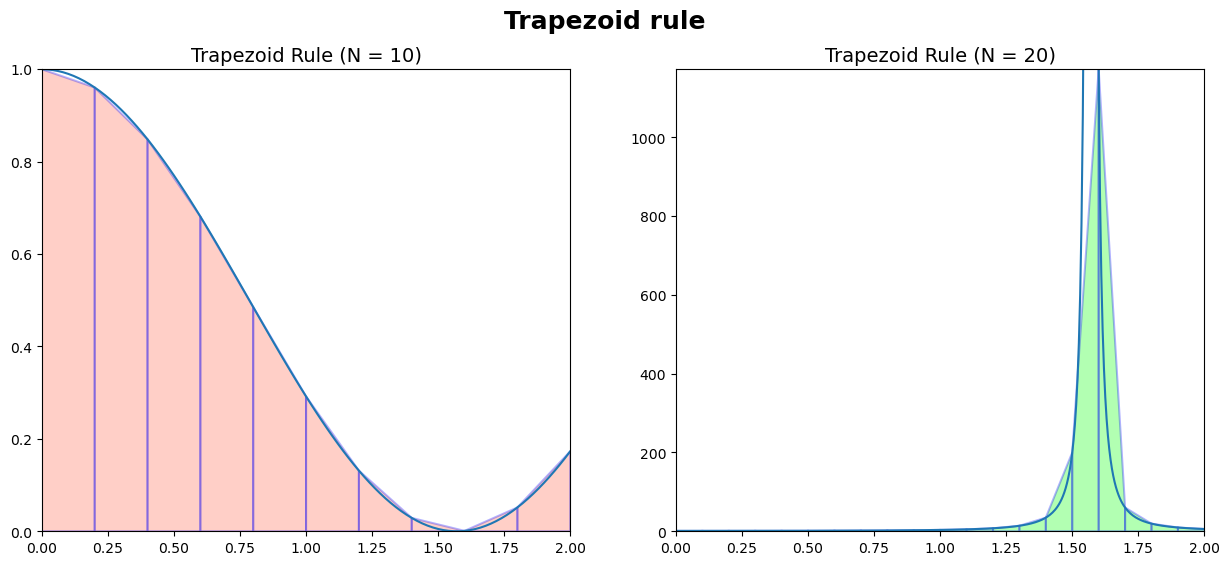

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex
from hd_Numerical_Integration_Algorithms import Trapz  
    
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15, 6))
ax = ax.ravel()
Colors = ['Tomato', 'Lime']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle('Trapezoid rule', fontproperties=font, fontsize = 18)
# a
i = 0
f = lambda x : np.cos(x)**2
a = 0
b = 2
N = 10

int_text = '\\int_{0}^{2} \\cos^2(x)\\, dx ='
TrapzPlots(f= f, a = a, b= b, N = N, ax = ax[i], CL = Colors[i])
Int_trapz = Trapz(f= f, a = a, b= b, N = N)
display(Latex(int_text + '''\\frac {h}{2}\\sum _{n=1}^{%i} \\left(f(x_{n-1})+f(x_{n})\\right) = %.4e''' % (N, Int_trapz)))
del Int_trapz

# b
i = 1
f = lambda x : 1 + np.tan(x)**2
a = 0
b = 2
N = 20

int_text = '\\int_{0}^{2} 1 + \\tanh^2(x)\\, dx ='
TrapzPlots(f= f, a = a, b= b, N = N, ax = ax[i], CL = Colors[i])
Int_trapz = Trapz(f= f, a = a, b= b, N = N)
display(Latex(int_text + '''\\frac {h}{2}\\sum _{n=1}^{%i} \\left(f(x_{n-1})+f(x_{n})\\right) = %.4e''' % (N, Int_trapz)))
del Int_trapz

The following theorem is **Theorem 4.5** from {cite:ps}`burden2005numerical`.

`````{admonition}Trapezoidal_Error
For the Trapezoid quadrature, if $f$ is twice differentiable, $f''$ is continuous, and $f''(x)\leq M$, then
\begin{equation}\label{Trapezoidal_Error_eq}
E_{h} = \left|\int _{a}^{b}f(x)\,dx - \frac {h}{2}\sum _{j=0}^{n-1} \left(f(x_{j})+f(x_{j+1})\right)\right|

\leq M\,\frac{(b-a)^3}{12n^2} = M\,\frac{(b-a)}{12}h^{2}.
\end{equation}

`````
\begin{proof} Here, we follow the proof provided by {cite:ps}`cruz2003elementary}`.

Assume that the interval $[a,b]$ is equidistantly spaced as follows,
\begin{equation*}
a = x_{0} < x_{1}< x_{2}< \cdots < x_{n-1}<  x_{n} = b,
\end{equation*}
and let $h = \Delta x = x_{j+1} - x_{j} = (b-a)/n$ for $0\leq j \leq n-1$. Then,
\begin{align}\label{trapz_proof_eq00}
E_{h} & =\left|
\frac {h}{2}\sum_{j = 0}^{n-1} \left(f(x_{j})+f(x_{j+1})\right) -
\sum_{j = 1}^{n}\int _{x_{j-1}}^{x_{j}}f(t)\,dt
\right|
\notag \\ &
= \left|
\frac {1}{2}\left(\frac{b-a}{n}\right)\sum_{j = 1}^{n} \left(f(x_{j-1})+f(x_{j})\right) -
\sum_{j = 1}^{n}\int _{x_{j-1}}^{x_{j}}f(t)\,dt
\right|
\notag \\ &
=\left| \sum_{j = 1}^{n} \left(\frac{b-a}{2n}\right)\left(f(x_{j-1})+f(x_{j})\right) - \int _{x_{j-1}}^{x_{j}}f(t)\,dt\right|
\end{align}
Now, define the following for $1 \leq j \leq n$
\begin{equation}
L_{j} = \left(\frac{b-a}{2n}\right)\left(f(x_{j-1})+f(x_{j})\right) - \int _{x_{j-1}}^{x_{j}}f(t)\,dt.
\end{equation}
On the other hand, the midpoint of each interval can be denoted as $c_{j} = (x_{j-1} + x_{j})/2$. Thus,
\begin{equation}\label{trapz_proof_eq01}
x_{j} - c_{j} = c_{j} - x_{j-1}  = \frac{b-a}{2n}.
\end{equation}
We also have the observation by the integration by parts:
\begin{align}
\int _{x_{j-1}}^{x_{j}} (t- c_{j})\,f'(t)\,dt &=
(x_{j} - c_{j}) f(x_{j}) - (x_{j-1} - c_{j}) f(x_{j-1}) - \int_{x_{j-1}}^{x_{j}}f(t)\,dt
\notag \\ &
= \left(\frac{b-a}{2n}\right)\left(f(x_{j-1}) + f(x_{j})\right) - \int_{x_{j-1}}^{x_{j}}f(t)\,dt = L_{j}
\end{align}

<div class="alert alert-block alert-info">
Recall that the integration by parts formula states:
\begin{align*}\int _{a}^{b}u(x)v'(x)\,dx&={\Big [}u(x)v(x){\Big ]}_{a}^{b}-\int _{a}^{b}u'(x)v(x)\,dx\\&=u(b)v(b)-u(a)v(a)-\int _{a}^{b}u'(x)v(x)\,dx.\end{align*}
</div>

We can use the integration by parts again and the Fundamental Theorem of Calculus,

\begin{align}\label{trapz_proof_eq02}
L_{j} & =
\int _{x_{j-1}}^{x_{j}} (t- c_{j})\,f'(t)\,dt
\notag \\ &
= \frac{(x_{j} - c_{j})^2}{2}f'(x_{j}) - \frac{(x_{j-1} - c_{j})^2}{2}f'(x_{j-1}) -\frac{1}{2}\int _{x_{j-1}}^{x_{j}} (t- c_{j})^2\,f''(t)\,dt
\end{align}

It follows that,
\begin{equation}\label{trapz_proof_eq03}
L_{j} = \int _{x_{j-1}}^{x_{j}} (t- c_{j})\,f'(t)\,dt =
\frac{1}{2}\left(\frac{b-a}{2n}\right)^2 \left( f'(x_{j}) - f'(x_{j-1}) \right)
-\frac{1}{2}\int _{x_{j-1}}^{x_{j}} (t- c_{j})^2\,f''(t)\,dt
\end{equation}

<div class="alert alert-block alert-info">
\textbf{Second Fundamental Theorem of Calculus}: assume that $f$ is a real-valued continuous function on the closed interval $[a,b]$ and $F$ is the indefinite integral of $f$ on $[a,b]$, then
\begin{equation}
\int_a^b f(t)\,dt = F(b)-F(a).
\end{equation}
</div>

Using the above theorem, we have,
\begin{align}\label{trapz_proof_eq04}
L_{j} & =
\int _{x_{j-1}}^{x_{j}} (t- c_{j})\,f'(t)\,dt =
\frac{1}{2}\left(\frac{b-a}{2n}\right)^2\int _{x_{j-1}}^{x_{j}} f''(t)\,dt
-\frac{1}{2}\int _{x_{j-1}}^{x_{j}} (t- c_{j})^2\,f''(t)\,dt
\notag \\ &
= \frac{1}{2}\int _{x_{j-1}}^{x_{j}} \left( \left(\frac{b-a}{2n}\right)^2 - (t- c_{j})^2 \right)f''(t) \,dt
\end{align}
Thus, we have,
\begin{align}\label{trapz_proof_eq05}
E_{h}  =\left| \sum_{j = 1}^{n} L_{j} \right|
&\leq \sum_{j = 1}^{n} \left|  L_{j} \right|
\notag \\ &
\leq \frac{1}{2} \sum_{j = 1}^{n} \int _{x_{j-1}}^{x_{j}} \left( \left(\frac{b-a}{2n}\right)^2 - (t- c_{j})^2 \right) \left\| f''(t)\right\| \,dt
\notag \\ &
\leq \frac{M}{2} \sum_{j = 1}^{n} \int _{x_{j-1}}^{x_{j}} \left( \left(\frac{b-a}{2n}\right)^2 - (t- c_{j})^2 \right)\,dt
\end{align}
However, it is easy to show that
\begin{equation}\label{trapz_proof_eq06}
\int _{x_{j-1}}^{x_{j}} \left( \left(\frac{b-a}{2n}\right)^2 - (t- c_{j})^2 \right)\,dt = \frac{1}{6}\left(\frac{b-a}{n}\right)^{3}.
\end{equation}
Therefore,
\begin{align}\label{trapz_proof_eq07}
E_{h} \leq \frac{M}{2} \sum_{j = 1}^{N} \frac{1}{6}\left(\frac{b-a}{n}\right)^{3}
& =  \frac{M}{12} \sum_{j = 1}^{n} \left(\frac{b-a}{n}\right)^{3}
= \frac{M}{12}(n) \left(\frac{b-a}{n}\right)^{3}
= \frac{M}{12}\frac{(b-a)^3}{n^2}
\notag \\ &
= \frac{M(b-a)}{12}\frac{(b-a)^2}{n^2}
= \frac{M(b-a)}{12}\left(\frac{b-a}{n}\right)^2
= \frac{M(b-a)}{12}h^2.
\end{align}

<font color='Blue'><b>Example</b></font>: Assume that we want to use the Trapezoidal rule to approximate ${\displaystyle\int_{0}^{2} \frac{1}{1+x}\, dx}$. Find the smallest $n$ for this estimation that produces an absolute error of less than $5 \times 10^{-6}$. Then, evaluate ${\displaystyle\int_{0}^{2} \frac{1}{1+x}\, dx}$ using the Trapezoidal rule to verify the results.

<font color='Green'><b>Solution</b></font>:

Note that the exact integration can be done as follows,
\begin{equation*}
\int_{0}^{2} \frac{1}{1+x}\, dx = \ln(x+1) {\Big|}_{0}^{2} = \ln(3).
\end{equation*}
Now, in order to estimate the minimum $n$ using Theorem \ref{Trapezoidal_Error}, we need
\begin{equation*}
f(x) = \frac{1}{x+1} \quad \Rightarrow \quad f'(x) = -\frac{1}{(x + 1)^2} \quad \Rightarrow \quad f''(x) = \frac{2}{(x + 1)^3}.
\end{equation*}
There are various approaches to determining the maximum of $f''(x)$ on $[0,~2]$, as we have previously discussed. Here, we can see that the (continuous) function $f''(x)$ on the interval $[0,~2]$ is decreasing.

```{figure} ../Figs/fig5_10.jpg
---
height: 300px
name: directive-fig
```

Thus,
\begin{equation*}
M = \max_{0 \leq x \leq 2}|f''(x)| = f''(0) = 2.
\end{equation*}
It follows that
\begin{equation*}
\frac{(b -a)^3}{12\,n^2} M \leq 5\times 10^{-06}
\end{equation*}
Since $a = 0$, $b= 2$, and $M = 2$, we have,
\begin{align*}
& \frac{(2 - 0)^3}{12\,n^2}(2)  < 5\times 10^{-6}
\\ \quad \Rightarrow \quad  & \frac{16}{12\,n^2}  < 5\times 10^{-6}
\\  \quad \Rightarrow \quad & \frac{4}{3\,n^2}  < 5\times 10^{-6}
\\  \quad \Rightarrow \quad &
 n^2 > \frac{4}{3(5\times 10^{-6})} = \frac{4}{1.5\times 10^{-5}}
\\  \quad \Rightarrow \quad &
n > \sqrt{\frac{4}{1.5\times 10^{-5}}} = 516.398
\end{align*}
To test this the above $n$, let $n = 517$ (the smallest integer after 516.398).We have,

In [4]:
E = 5e-6
f = lambda x : 1/(x+1) # f(x)
f2 =  lambda x : 2/((x+1)**3) # f''(x)
Exact = np.log(3) # Exact Int
a =0; b= 2; x = np.linspace(a, b)
M = max(abs(f2(x)))
N = int(np.ceil(np.sqrt((M*(b-a)**3)/(12* E))))
print('N = %i' % N)
T = Trapz(f, a, b, N) # Trapezoidal rule
Eh = abs(T - Exact)
print('Eh = %.4e' % Eh)

N = 517
Eh = 1.1085e-06


Thus,
\begin{equation*}
\int_{0}^{2} \frac{1}{1+x}\, dx  \approx \frac {h}{2}\sum _{j=1}^{517} \left(f(x_{j-1})+f(x_{j})\right) =1.0986133971903596.
\end{equation*}

Therefore,

On the other hand, the exact value can be obtained using $\displaystyle \int_{0}^{2} \frac{1}{1+x}\, dx  = \ln(3)$.
Thus, the absolute error here,
\begin{equation*}
E_{h} = 1.1085\times 10^{-06}.
\end{equation*}

`````{admonition} Proposition


For the Trapezoid quadrature from \eqref{trap.equal.eq02}, if $f$ is twice differentiable and $f''$ is continuous, then
\begin{equation}\label{Trapezoidal_Error_eq}
E_{h} = \left|\int _{a}^{b}f(x)\,dx - \frac {h}{2}\sum _{j=0}^{n-1} \left(f(x_{j})+f(x_{j+1})\right)\right|
= \frac {(b-a)}{12}h^{2} \left|f''(\xi)\right|.
\end{equation}
for some $\xi \in [a, b]$.

`````

<font color='Blue'><b>Example</b></font>:
<font color='Blue'><b>Example</b></font>: For
\begin{equation*}
\int_{0}^{2} \frac{1}{1 + x}\,dx = \ln(3),
\end{equation*}
use Python/MATLAB show that the order of convergence for the Trapezoid rule is indeed 2 numerically!

To see the order of convergence of this method, we have,

In [6]:
import pandas as pd
a = 0; b = 2; f = lambda x : 1/(x+1); Exact = np.log(3)
N = [10*(2**i) for i in range(1, 10)]
Error_list = [];
for n in N:
    T = Trapz(f = f, a = a, b = b, N = n)
    Error_list.append(abs(Exact - T))
Table = pd.DataFrame(data = {'h':[(b-a)/n for n in N], 'n':N, 'Eh': Error_list})
    
display(Table.style.set_properties(subset=['h', 'n'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

,h,n,Eh
0,1.0000e-01,2.0000e+01,7.3992e-04
1,5.0000e-02,4.0000e+01,1.8513e-04
2,2.5000e-02,8.0000e+01,4.6293e-05
3,1.2500e-02,1.6000e+02,1.1574e-05
4,6.2500e-03,3.2000e+02,2.8935e-06
5,3.1250e-03,6.4000e+02,7.2338e-07
6,1.5625e-03,1.2800e+03,1.8084e-07
7,7.8125e-04,2.5600e+03,4.5211e-08
8,3.9063e-04,5.1200e+03,1.1303e-08


In [7]:
hd.derivative_ConvergenceOrder(vecs = [Table['Eh'].values], labels = ['Trapezoidal rule'], xlabel = r"$$i$$",
                               ylabel = "r$E_{h_{i}} / E_{h_{i-1}}$",
                               title = 'Order of accuracy: Trapezoidal rule',
                               legend_orientation = 'horizontal')